Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, subprocess, sys, json, glob
#from molmod import *
#from molmod.io import FCHKFile
#from molmod.io.xyz import XYZReader, XYZFile
import requests
#import wts

In [2]:
plots = "/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/"

In [3]:
plots = "plots/"

print(2)

In [4]:
2

2

get_dihed.py

In [5]:
os.getcwd()

'/home/hagen/anaconda3/bin/hemejpn'

take_properties.py

In [6]:
df = pd.DataFrame({2:["a","b"],3:[1,2]})
df  =df.set_index(2)
#df.index = df.index.str.upper()

df

,3
2,
a,1
b,2


In [7]:
if(False):
    wts.TCL-Skript()
    wts.dihedpdb()        
    wts.prepare_gaussian_logs().core()
    wts.onecsv()

    wts.read_redpot_lit()

In [8]:
dfex_1 =pd.read_csv("tables/mono.csv")
dfex_1  =dfex_1.set_index("pdb")
dfex_1 = dfex_1[[ "Elektrode","Ligand","EMv"]]
dfex_3 = pd.read_csv("tables/duplicated_moded.csv")
dfex_4 = dfex_3.drop_duplicates("PDB", keep=False)
dfex_4= dfex_4.set_index("pdb")#.rename({"PDB":"pdb"})
dfex_4 = dfex_4[[ "Elektrode","Ligand","EMv"]]

dfex_lit = dfex_1.append(dfex_4)
dfex_lit.index = dfex_lit.index.str.upper()
dfex_lit =dfex_lit.rename(columns = {"EMv":"Em_lit"})
df_axlig = pd.read_csv("tables/axligand.csv")
df_axlig = df_axlig.rename(columns={"# PDB": "pdb","ligand" : "ligand_pydish"}).set_index("pdb")
df_axlig = df_axlig[["ligand_pydish","saddling","ruffling"]]

df_calc = pd.read_csv("tables/calculated.csv")
df_calc = df_calc.drop("Unnamed: 0", axis=1).set_index("pdb")
_dihedral = pd.read_csv("tables/Dihedral.csv")
_dihedral = _dihedral.rename(columns={"Unnamed: 0":"PDB"})
_dihedral = _dihedral.set_index("PDB")

df_ruffling = pd.read_csv("tables/Ruffling.csv").rename(columns = {"Unnamed: 0":"PDB"}).set_index("PDB")
df_saddling = pd.read_csv("tables/Saddling.csv").rename(columns = {"Unnamed: 0":"PDB"}).set_index("PDB")
df_ruffling_all = df_ruffling.copy()
df_saddling_all = df_saddling.copy()
modelist1 = [i for i in df_ruffling_all.index if i in dfex_lit.index]
modelist2 = [i for i in df_saddling_all.index if i in dfex_lit.index]
if (modelist2 == modelist1):
    print("ruffling + saddling")
else:
    raise Error
df_ruffling_all = df_ruffling_all.loc[modelist1]
df_saddling_all = df_saddling_all.loc[modelist1]
    
    
    
    
    
    
    
    
dfHemetype = pd.read_csv("tables/Hemetypes.csv")
dfHemetype = dfHemetype.set_index("pdb")


pdb_calc  = list(set(df_calc.index))
pdb_lit  = list(set(dfex_lit.index))
#print(    ([i for i in pdb_calc  if not i in pdb_lit])   )

pdbavaible = [i for i in pdb_calc if i in pdb_lit]
pdbavaiblepdb_calc  = list(set(df_calc.index))
pdb_lit  = list(set(dfex_lit.index))
#print(    ([i for i in pdb_calc  if not i in pdb_lit])   )

pdbavaible = [i for i in pdb_calc if i in pdb_lit]
#pdbavaible

df_ruffling = df_ruffling.loc[pdbavaible]
df_saddling = df_saddling.loc[pdbavaible]

ruffling + saddling


# was ist mit 2gms?

# 1vb6 nochmal überlegen, gab zwei hemes mit untershcielcihen liganden

In [9]:
if not all(i in df_ruffling.index for i in pdbavaible):
    print(f"ruffling fehlt{[i for i in pdbavaible if i not in df_ruffling.index]}")
    
if not all(i in _dihedral.index for i in pdbavaible):
    print(f"Dihedral fehlt{[i for i in pdbavaible if i not in _dihedral.index]}")

if not all(i in df_saddling.index for i in pdbavaible):
    print(f"saddling fehlt{[i for i in pdbavaible if i not in df_saddling.index]}")    

In [10]:
df_ruffling.head()

,C3_SW_C1_SW_C1_WS_C3_WS,C3_SO_C1_SO_C1_OS_C3_OS,C3_WN_C1_WN_C1_NW_C3_NW,C3_NO_C1_NO_C1_ON_C3_ON
PDB,,,,
1FHF,-16.866547,-11.634027,23.562327,-13.419490
1CMQ,-12.574412,30.710146,0.011889,-14.676871
1A6K,14.519887,-1.292667,-7.636986,-10.146471
1CCC,-8.061759,24.512677,8.360383,-28.276804
1F1F,7.303162,2.868246,11.580548,-19.137833


In [11]:
[i for i in df_ruffling_all.index if i not in dfex_lit.index]

[]

In [39]:
df_mode = pd.DataFrame({"Em_lit":[dfex_lit.loc[i]["Em_lit"] for i in modelist1]}, index = modelist1)

df_mode["ruffling_mean"] = df_ruffling_all.mean(axis = 1)
df_mode["ruffling_max"] = df_ruffling_all.max(axis = 1)
df_mode["ruffling_min"] = df_ruffling_all.min(axis = 1)
df_mode["saddling_mean"] = df_saddling_all.mean(axis = 1)
df_mode["saddling_max"] = df_saddling_all.max(axis = 1)
df_mode["saddling_min"] = df_saddling_all.min(axis = 1)
df_mode["ruffling_max2"] = [a if abs(a)>abs(b) else b for a,b in zip(df_mode["ruffling_max"],df_mode["ruffling_min"])]
df_mode["saddling_max2"] = [a if abs(a)>abs(b) else b for a,b in zip(df_mode["saddling_max"],df_mode["saddling_min"])]

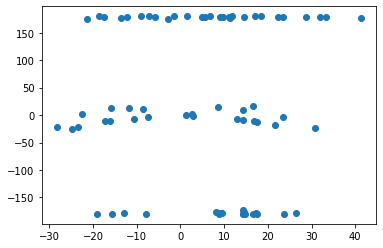

In [40]:
plt.scatter(df_mode["ruffling_max2"],df_mode["saddling_max2"])

In [44]:
df_mode[df_mode["saddling_max"]>50]

,Em_lit,ruffling_mean,ruffling_max,ruffling_min,saddling_mean,saddling_max,saddling_min,ruffling_max2,saddling_max2
1EWH,350.0,4.063519,23.391193,-16.112808,94.346063,178.859162,5.533247,23.391193,178.859162
1YCC,290.0,10.562476,41.349419,-8.963366,95.247806,177.593573,8.540753,41.349419,177.593573
1F1F,314.0,0.653531,11.580548,-19.137833,6.766094,178.527305,-179.993224,-19.137833,-179.993224
1H9X,60.0,-0.272107,11.044609,-7.957888,93.503916,178.842573,6.864061,11.044609,178.842573
1BE3_HISMET,250.0,-0.138612,31.977125,-19.721831,6.470901,178.647170,-177.822830,31.977125,178.647170
1CO6,296.0,0.548421,4.830197,-2.165456,93.618945,178.811659,0.558950,4.830197,178.811659
1A6K,50.0,-1.139059,14.519887,-10.146471,1.232260,179.205138,-178.277849,14.519887,179.205138
1LS9,355.0,6.160434,17.154296,-5.178009,93.442114,179.758869,4.550161,17.154296,179.758869
2PCB_HISMET,260.0,0.544400,5.417465,-7.273915,6.664319,179.760374,-178.765012,-7.273915,179.760374
1JP9,50.0,0.120361,1.356857,-1.431851,89.837092,179.513896,-0.172962,-1.431851,179.513896


In [25]:
df_mode_r20 = df_mode[df_mode["ruffling_max"]<20].copy()
df_mode_s5 = df_mode[df_mode["saddling_max2"]>5].copy()


Text(0, 0.5, 'Ruffling')

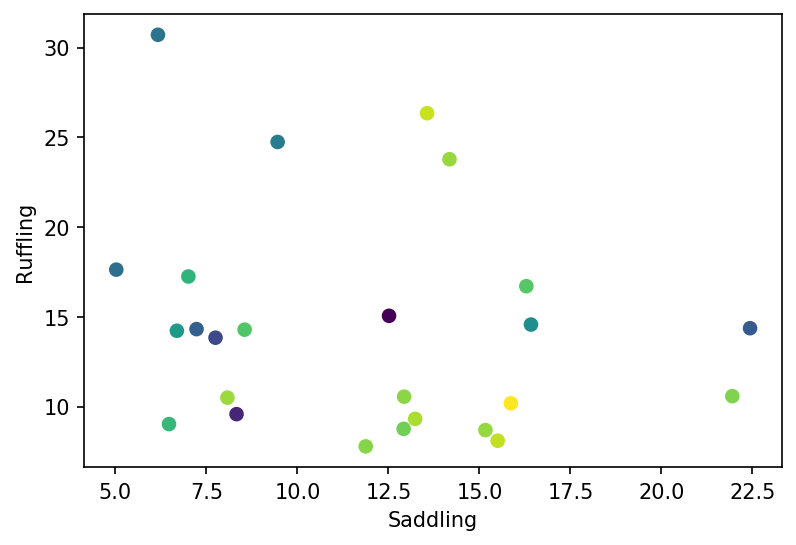

In [26]:
fig = plt.figure(dpi =150)#,figsize = [10,15])

plt.scatter(df_mode_s5["saddling_max2"],df_mode_s5["ruffling_max"], c = df_mode_s5["Em_lit"])
plt.xlabel("Saddling")
plt.ylabel("Ruffling")

/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


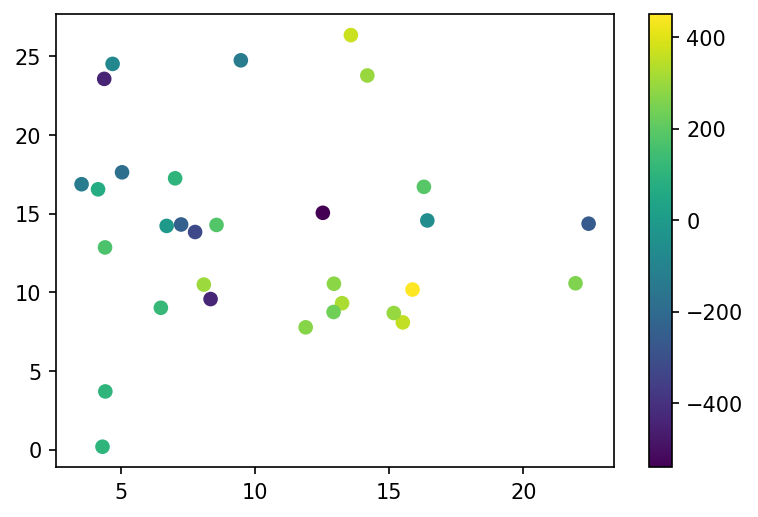

In [14]:
df_mode_t1 = df_mode[df_mode["saddling_max2"]>3][df_mode["ruffling_max"]<30].copy()
fig = plt.figure(dpi =150)#,figsize = [10,15])
plt.scatter(df_mode_t1["saddling_max2"],df_mode_t1["ruffling_max"], c = df_mode_t1["Em_lit"])
plt.colorbar()


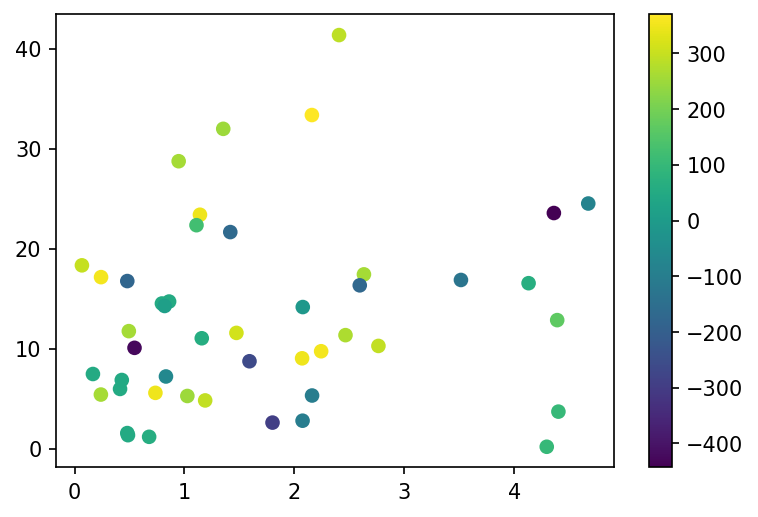

In [15]:
#df_mode_s5 = df_mode[df_mode["saddling_max2"]<4].copy()
df_mode_s4 = df_mode[df_mode["saddling_max2"]<4].copy()

fig = plt.figure(dpi =150)#,figsize = [10,15])

plt.scatter(df_mode_s5["saddling_max2"],df_mode_s5["ruffling_max"], c = df_mode_s5["Em_lit"])
plt.colorbar()

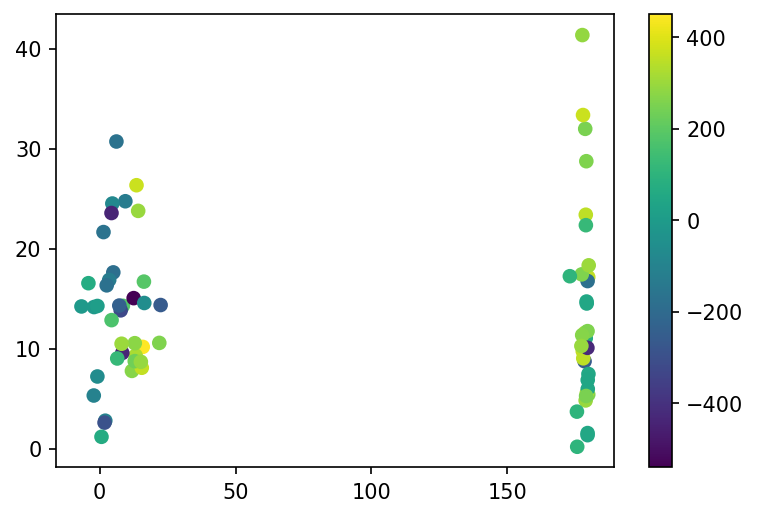

In [30]:
#df_mode_s5 = df_mode[df_mode["saddling_max2"]<4].copy()
df_mode_s4 = df_mode[df_mode["saddling_max2"]<4].copy()

fig = plt.figure(dpi =150)#,figsize = [10,15])

plt.scatter(df_mode["saddling_max"],df_mode["ruffling_max"], c = df_mode["Em_lit"])
plt.colorbar()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



In [17]:
def rounddata(i,rounding):
#    global rounding 
    return int(i/rounding+0.5)*rounding

In [18]:
def barpoint(dfbar,X,Y,rounding = 1):

    #dfbar = df_mode[["ruffling_max","Em_lit"]].copy()
    #dfbar = df_mode[df_mode["ruffling_max"]<20][["ruffling_max","Em_lit"]].copy()
    fig = plt.figure(dpi =150)#,figsize = [10,15])


    #rounding = 1

    dfbar[rounding] = [rounddata(i,rounding) for i in dfbar[X]]

    ruflist = list(set(dfbar[rounding]))
    ruflist.sort()
    emlist = [dfbar[dfbar[rounding] ==i][Y].mean() for i in ruflist]


    ax = fig.add_subplot(111)

    ax.bar(ruflist, emlist, width = rounding*0.8,fill = False)
    ax.plot(dfbar[X] , dfbar["Em_lit"],"x",c="red")
    
    ax.set_xlabel(X)
    ax.set_ylabel("$E_{red}$")
    ax.set_title(f"round on {rounding}")

    plt.show()

    #plt.bar(ruflist, emlist, width = rounding*0.8)

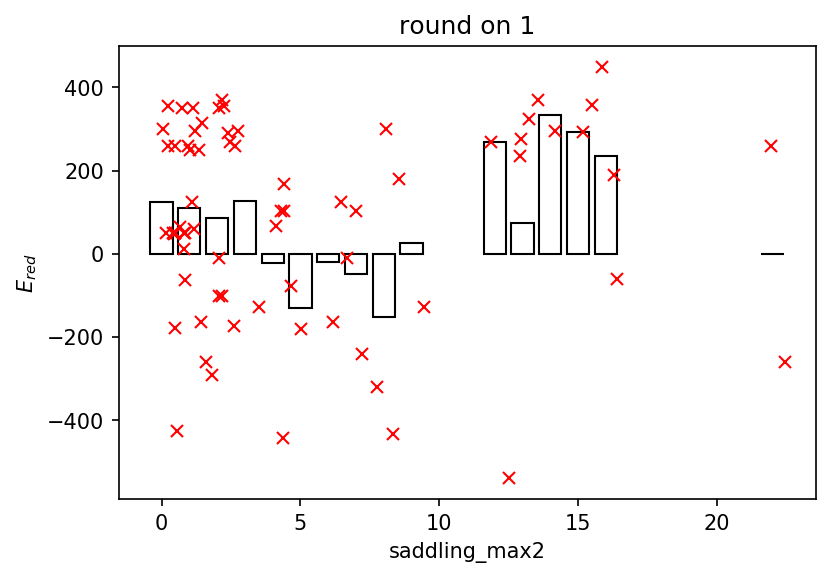

In [19]:
barpoint(df_mode, "saddling_max2","Em_lit")

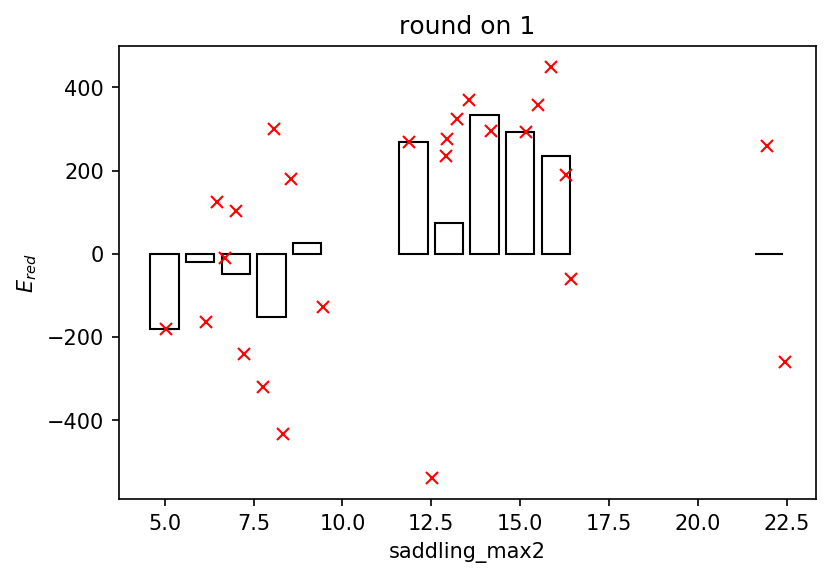

In [27]:
barpoint(df_mode_s5, "saddling_max2","Em_lit")

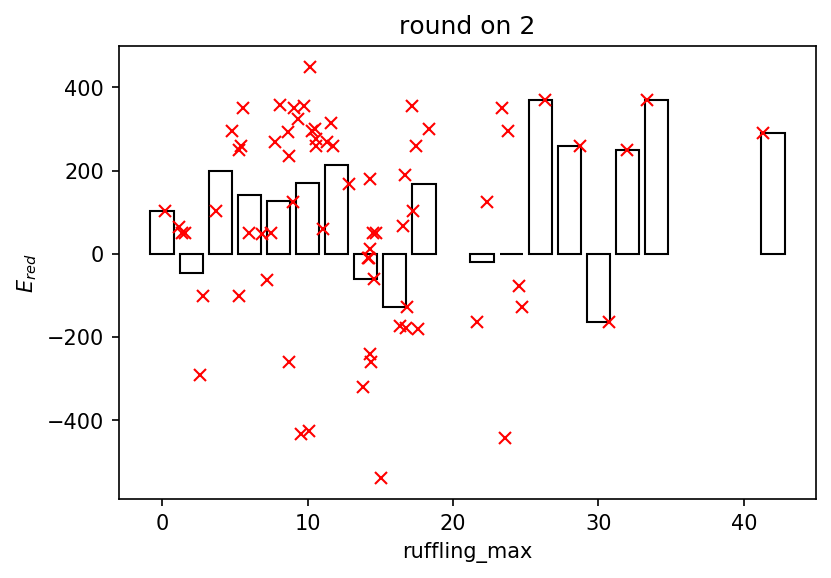

In [21]:
barpoint(df_mode, "ruffling_max","Em_lit",2)

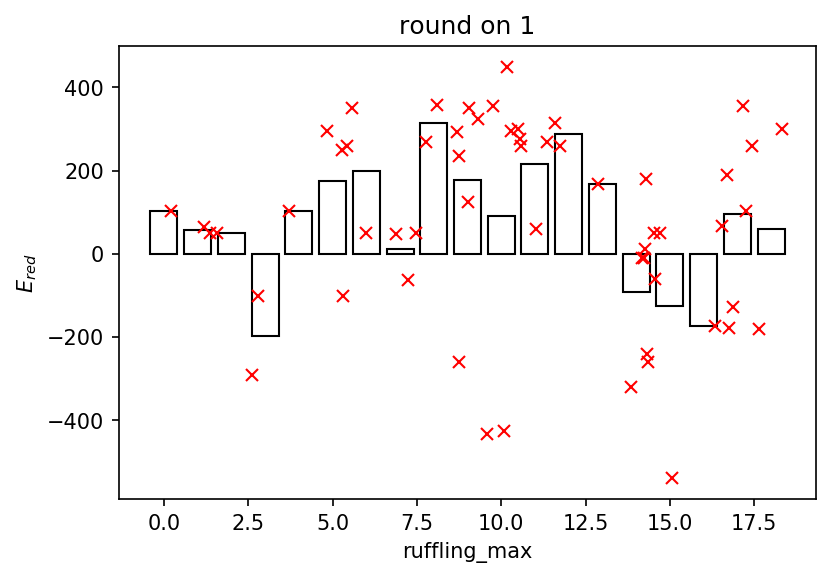

In [22]:
barpoint(df_mode_r20, "ruffling_max","Em_lit",1)